### Example 3.1: Wave interference
Suppose we drop a pebble in a pond and waves radiate out from the spot
where it fell. We could create a simple representation of the physics with a sine
wave, spreading out in a uniform circle, to represent the height of the waves at
some later time. If the center of the circle is at x1, y1 then the distance r1 to the
center from a point x, y is

\begin{equation}
r_1 = \sqrt{(x-x_1)^2 + (y-y_1)^2}
\end{equation}

and the sine wave for the height is

\begin{equation}
\xi_1(x,y) = \xi_0\,sin\,kr_1,
\end{equation}

where $\xi_0$ is the amplitude of the waves and k is the wavevector, related to the
wavelength $\lambda$ by $k$ = 2$\pi/\lambda$.
Now suppose we drop another pebble in the pond, creating another circular set of waves with the same wavelength and amplitude but centered on a different point $x_2$, $y_2$:

\begin{equation}
\xi_2(x,y) = \xi_0\,sin\,kr_2 \quad \quad \textrm{with} \quad \quad r_2 = \sqrt{(x-x_2)^2 + (y-y_2)^2}.
\end{equation}

Then, assuming the waves add linearly (which is a reasonable assumption for
water waves, provided they are not too big), the total height of the surface at a
point $x$, $y$ is

\begin{equation}
\xi(x,y) = \xi_0 \,sin\,kr_1 + \xi_0 \, sin\,kr_2.
\end{equation}

Suppose the wavelength of the waves is λ = 5 cm, the amplitude is 1 cm, and
the centers of the circles are 20 cm apart. Here is a program to make an image of
the height over a 1 m square region of the pond. To make the image we create an array of values representing the height $\xi$ at a grid of points and then use that array to make a density plot. In this example we use a grid of 500 $\times$ 500 points to cover the 1 m square, which means the grid points have a separation of 100/500 = 0.2 cm.

In [1]:
import numpy as np
from numpy import sin, sqrt, zeros, pi
from pylab import imshow, show

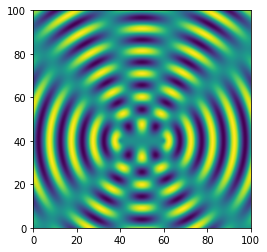

In [2]:
l = 5 #wave length
eo = 1 # amplitude
k = np.pi/l # wave vector
xi = np.zeros([500, 500]) #make 500 by 500 grid points
x1 = 40 #center of circles
y1 = 40
x2 = 60
y2 = 40
nx = np.linspace(0,100,500) #to make grid points
ny = np.linspace(0,100,500)
x, y = np.meshgrid(nx,ny)# creat 500 by 500 grid points
r1 = sqrt ((x-x1)**2 + (y-y1)**2)
r2 = sqrt ((x-x2)**2 + (y-y2)**2)
xi_1 = eo*sin(k*r1) 
xi_2 = eo*sin(k*r2)
xi = xi_1 + xi_2 
#make plot using xi
imshow(xi,origin="lower",extent=[0,100,0,100])

### Example: Two stationary point charges
A stationary point charge $q_0$ at $r_0$ produces an electric field whose magnitude and direction at a position $r$ is:

\begin{equation}
\mathbf{E(\mathbf{r})} = \frac{1}{4\pi \epsilon_0} q_0 \frac{\mathbf{r} - \mathbf{r_0}}{|\mathbf{r} - \mathbf{r_0}|^3}
\end{equation}

With N point charges $q_i$ at $r_i$, it can be written as:

\begin{equation}
\mathbf{E(\mathbf{r})} = \frac{1}{4\pi \epsilon_0} \sum^N_{i=1} q_i \frac{\mathbf{r} - \mathbf{r_i}}{|\mathbf{r} - \mathbf{r_i}|^3}
\end{equation}

Supposed we have two point charges $q_1=-e$ and $q_2=+e$ stationed at $\vec{r_1}$ = (1.0, 0.0) and $\vec{r_2}$ = (-1.0, 0.0), respectively. Let's plot electric field lines due to the two charges.


In [3]:
from math import pi
from numpy import meshgrid 
from matplotlib import pyplot as plt

In [4]:
k = 1/(4*pi)

In [5]:
#First of all Let us find E field at (x,y) due to charge qo at ro 
def E(qo, ro, x,y):
    dr3 = ((x-ro[0])**2 + (y-ro[1])**2)**(3/2)
    Ex, Ey = k*qo*(x-ro[0])*(1/dr3), k*qo*(y-ro[1])*(1/dr3) #Ex, Ey are X and Y components
    return Ex, Ey

In [6]:
nx, ny = 50, 50   #Let us make gride 
x = np.linspace(-2,2,nx)
y = np.linspace(-2,2,ny)
X,Y = np.meshgrid(x,y) #make gride points using meshgrid function

In [7]:
qo = np.array([1,-1],int)  #make array of charge and its position
ro = np.array([[1,0],[-1,0]],float)


In [8]:
#make 100 by 100 to store E field
Ex = np.zeros([nx,ny],float)
Ey = np.zeros([nx,ny],float)
for i in range(2):
    ex, ey = E(qo[i],ro[i],x=X,y=Y)
    Ex += ex
    Ey += ey

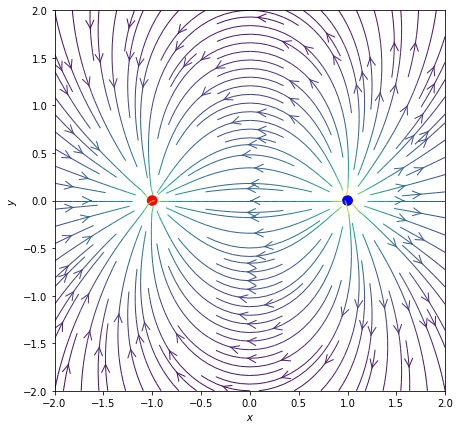

In [9]:
plt.figure(figsize=(7,7))
color = 2 * np.log(np.hypot(Ex, Ey)) #Use hppot function to find resultant
plt.streamplot(x, y, Ex, Ey, color=color, linewidth=1,
               density=1.5, arrowstyle='->', arrowsize=2.)  
q1 = plt.Circle((1, 0), 0.05, color='b', alpha=1.0) #charge is represented by circle
q2 = plt.Circle((-1,0), 0.05, color='r', alpha=1.0)
plt.gca().add_patch(q1)
plt.gca().add_patch(q2)

# set axis label and limit
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-2,2)
plt.ylim(-2,2)

# display
plt.show()